# PROJECT 1

# 1. Q1 

# Expenditures

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, we will calculate the growth rate of Real Personal Consumption Expenditures over the past 10 years.(8/1/2010-8/1/2020)
To begin, we will import this data.

In [278]:
data1 = pd.read_csv("PCEC96.csv")

In [279]:
data1.describe()

,PCEC96
count,121.000000
mean,11932.926446
std,859.143007
min,10689.800000
25%,11101.200000
50%,11936.700000
75%,12668.500000
max,13416.700000


Here, we define DATE as an object variable and convert it to a datetime.

In [280]:
data1.DATE

0      2010-08-01
1      2010-09-01
2      2010-10-01
3      2010-11-01
4      2010-12-01
          ...    
116    2020-04-01
117    2020-05-01
118    2020-06-01
119    2020-07-01
120    2020-08-01
Name: DATE, Length: 121, dtype: object

In [281]:
data1['DATE'] = pd.to_datetime(data1['DATE'])
data1 = data1.set_index('DATE')

In [282]:
data1.head()

,PCEC96
DATE,
2010-08-01,10689.8
2010-09-01,10701.6
2010-10-01,10728.0
2010-11-01,10759.8
2010-12-01,10774.2


Next we will create a new variable, log of Real Personal Consumption Expenditures. (This will be exemplified as logPCEC96.)

In [283]:
data1['PCEC96'] = pd.to_numeric(data1['PCEC96'], errors = 'coerce')
data1['PCEC96'] = data1['PCEC96']/100

In [284]:
data1['logPCEC96'] = np.log(data1['PCEC96'])

Here, we will add a variable PCEC969(t-1) because we will be needing this variable in order to calculate growth rate.

In [285]:
data1['PCEC96_t_1'] = data1['PCEC96'].shift()

Now we will calculate the growth rate of Real Personal Consumption Expenditures and the log ratio of the growth rate. The growth rate will be exemplified as the variable PCEC96_g and the variable representing the log ratio of the growth is PCEC96_I_r.

In [286]:
data1['PCEC96_g'] = (data1['PCEC96']-data1['PCEC96_t_1'])/data1['PCEC96_t_1']
data1['PCEC96_l_r'] = data1['logPCEC96']-data1['logPCEC96'].shift()
data1.head()

,PCEC96,logPCEC96,PCEC96_t_1,PCEC96_g,PCEC96_l_r
DATE,,,,,
2010-08-01,106.898,4.671875,NaN,NaN,NaN
2010-09-01,107.016,4.672978,106.898,0.001104,0.001103
2010-10-01,107.280,4.675442,107.016,0.002467,0.002464
2010-11-01,107.598,4.678402,107.280,0.002964,0.002960
2010-12-01,107.742,4.679739,107.598,0.001338,0.001337


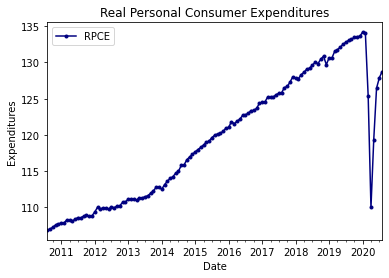

In [287]:
ax = data1['PCEC96'].plot(kind = 'line', label = 'RPCE', colormap='jet', marker='.', title = 'Real Personal Consumer Expenditures')
ax.set_xlabel('Date')
ax.set_ylabel('Expenditures')
ax.legend(loc = 'upper left')

After calculating both the growth rate of Real Personal Consumption Expenditures and the log ratio of the growth rate, we will now place them on the same graph together,(with Time on the X axis and growth rate/log ratio of growth rate on the Y axis), in order to see how they are similar and different over the past 10 years.

In [288]:
import matplotlib.pyplot as plt

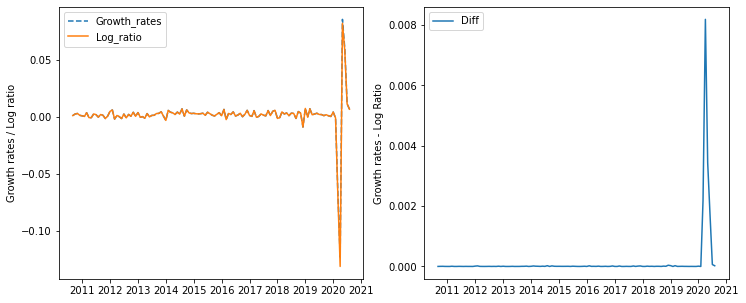

In [289]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(data1['PCEC96_g'],'--', label = 'Growth_rates')
plt.plot(data1['PCEC96_l_r'],  label = 'Log_ratio')
plt.ylabel('Growth rates / Log ratio')
plt.legend()

plt.subplot(122)
plt.plot(data1['PCEC96_g']-data1['PCEC96_l_r'],  label = 'Diff')
plt.ylabel('Growth rates - Log Ratio')
plt.legend()

The graph on the right depcits the difference between growth rates and the log ratio of the growth rates of Real Personal Consumption Expenditures over the past 10 years. Here, we can see that the difference between these two variables is close to zero, with the highest differential being around .008 in March 2020. In addition, we try to reduce the amount of variation in the growth rates of Real Personal Consumption Expenditures in the short run by taking the log ratio of the growth rates. This way, we can more easily determine long term trends in the growth rates. The difference between these two variables was close to zero for basically all of the 10 years because the growth rates themselves do not vary much in the short run, even though growth rates have clearly have a positive trend over the past 10 years. However, in March 2020, the difference between the growth rates and the log ratio is high because the growth rates of Real Personal Consumption Expenditures dramatically changed in a short period of time because the COVID-19 lockdown was announced. When the lockdown was announced, businesses closed and many consumers were left withouts, putting a lot of fear into many consumers. Thus, as a result of consumer's expectations changing, consumers started spending much less in a short period of time which ultimately led to this high difference in growth rates and the log ratio of the growth rates.

# 1. Q1

# Investment

Now, we will import the data from FRED on Real Gross Private Domestic Investment. Real Gross Private Domestic Investment will be represented as GPDIC1. Here we are repeating the steps from "Q1 Expenditures" in order to graph the differences between the growth rates of Real Gross Private Domestic Investment and the log ratio of the growth rates. Once they are graphed, we will be able to visually compare them below.

In [290]:
data2 = pd.read_csv("GPDIC1.csv")

In [291]:
data2.describe()

,GPDIC1
count,41.000000
mean,2945.615049
std,378.529369
min,2196.706000
25%,2648.459000
50%,3047.027000
75%,3207.492000
max,3481.311000


In [292]:
data2['DATE']

0     2010-04-01
1     2010-07-01
2     2010-10-01
3     2011-01-01
4     2011-04-01
5     2011-07-01
6     2011-10-01
7     2012-01-01
8     2012-04-01
9     2012-07-01
10    2012-10-01
11    2013-01-01
12    2013-04-01
13    2013-07-01
14    2013-10-01
15    2014-01-01
16    2014-04-01
17    2014-07-01
18    2014-10-01
19    2015-01-01
20    2015-04-01
21    2015-07-01
22    2015-10-01
23    2016-01-01
24    2016-04-01
25    2016-07-01
26    2016-10-01
27    2017-01-01
28    2017-04-01
29    2017-07-01
30    2017-10-01
31    2018-01-01
32    2018-04-01
33    2018-07-01
34    2018-10-01
35    2019-01-01
36    2019-04-01
37    2019-07-01
38    2019-10-01
39    2020-01-01
40    2020-04-01
Name: DATE, dtype: object

In [293]:
data2['DATE'] = pd.to_datetime(data2['DATE'])
data2 = data2.set_index('DATE')

In [294]:
data2.head()

,GPDIC1
DATE,
2010-04-01,2196.706
2010-07-01,2294.672
2010-10-01,2287.362
2011-01-01,2244.241
2011-04-01,2336.057


In [295]:
data2['GPDIC1'] = pd.to_numeric(data2['GPDIC1'], errors = 'coerce')
data2['GPDIC1'] = data2['GPDIC1']/100

In [296]:
data2['logGPDIC1'] = np.log(data2['GPDIC1'])

In [297]:
data2['GPDIC1_t_1'] = data2['GPDIC1'].shift()

In [298]:
data2['GPDIC1_g'] = (data2['GPDIC1']-data2['GPDIC1_t_1'])/data2['GPDIC1_t_1']
data2['GPDIC1_l_r'] = data2['logGPDIC1']-data2['logGPDIC1'].shift()
data2.head()

,GPDIC1,logGPDIC1,GPDIC1_t_1,GPDIC1_g,GPDIC1_l_r
DATE,,,,,
2010-04-01,21.96706,3.089544,NaN,NaN,NaN
2010-07-01,22.94672,3.133175,21.96706,0.044597,0.043631
2010-10-01,22.87362,3.129984,22.94672,-0.003186,-0.003191
2011-01-01,22.44241,3.110952,22.87362,-0.018852,-0.019032
2011-04-01,23.36057,3.151050,22.44241,0.040912,0.040097


In [299]:
ax = data1['GPDIC1'].plot(kind = 'line', label = 'RGPDI', colormap='jet', marker='.', title = 'Real Gross Private Domestic Investment')
ax.set_xlabel('Date')
ax.set_ylabel('Investment')
ax.legend(loc = 'upper left')

KeyError: 'GPDIC1'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(data2['GPDIC1_g'],'--', label = 'Growth_rates')
plt.plot(data2['GPDIC1_l_r'],  label = 'Log_ratio')
plt.ylabel('Growth rates / Log ratio')
plt.legend()

plt.subplot(122)
plt.plot(data2['GPDIC1_g']-data2['GPDIC1_l_r'],  label = 'Diff')
plt.ylabel('Growth rates - Log Ratio')
plt.legend()

Here, we can see that while the difference in growth rates and the log ratio are mostly close to zero, there is evidently more variation in Real Gross Private Domestic Investment than in Real Personal Consumption Expenditures over the past 10 years. The difference has multiple small peaks from 2011 to 2015. These small peaks occurred because large changes in growth rates occurred over small periods of time, which led to these multiple, small peaks occuring. Even though these small peaks existed, the GPDIC1 ultimately stayed on the same trend from 2011 to 2015, which explains why the difference stays close to zero for most of the past 10 years. Furthermore, the difference between growth rates and the log ratio skyrocketed in 2020, as a result of a large decrease in the growth rates of GPDIC1. This likely happened because of the lockdowns that occurred as a result of COVID-19 in March 2020. Once COVID-19 lockdowns began, consumers were significantly fearful and their expectations of the market drastically fell. Thus, many consumers sold off investments in a very short period of time, leading to the large variance in the growth rates of GPDIC1.

# 2. Q2 (a)

# Bond YTM

In [ ]:
import numpy as np
import scipy as sc

In [ ]:
def bondpv(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons)

In [ ]:
from scipy import optimize

In [ ]:
optimize.newton(lambda ytm: bondpv(ytm, term=30, coupon_rate=.1, face=1000)-1280, .1)

Above, we calculated the yield to maturity of the Treasury Bond.

YTM = 0.0760494196883131

# Bond Duration

In [ ]:
def bondmacd(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons) / discounted_face

In [ ]:
bondmacd(ytm=0.0760494196883131, term=30, coupon_rate=.1, face=1000)

Above, we calculated the Macauly Duration of the Treasury Bond.

MACD = 121.46525155591354

# Note YTM

In [ ]:
import numpy as np
import scipy as sc

In [ ]:
def notepv(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons)

In [ ]:
from scipy import optimize

In [ ]:
optimize.newton(lambda ytm: notepv(ytm, term=10, coupon_rate=.07, face=1000)-1000, .07)

Above, we calculated the yield to maturity of the treasury note.

YTM = 0.07000000000000012

# Note Duration

In [ ]:
def notemacd(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons) / discounted_face

In [ ]:
notemacd(ytm=0.07000000000000012, term=10, coupon_rate=.07, face=1000)

Above, we calculated the Macaulay Duration of the Treasury Note.

MACD = 509.3164434920071

Thus, after calculating the Macaulay Duration for both the Bond and the Note, I would choose the Bond because it has a lower Macaulay Duration then the Note. Therefore, I would receive my full payments sooner with the Bond than the Note.

# 2. Q2 (b)

# Gains/Losses of the Bond

In [ ]:
import numpy as np
import scipy as sc

In [ ]:
def bondpv(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons)

In [ ]:
optimize.newton(lambda ytm: bondpv(ytm, term=28, coupon_rate=.1, face=1000)-1280, .1)

In [ ]:
bondpv(ytm=0.07565732447350135, term=28, coupon_rate=.1, face=1000)

Above, we calculated the present value of the bond in the 2nd year. Now, we will calculate the bond in the 3rd year so we can compare later.

In [ ]:
bondpv(ytm=-.02434267553, term=27, coupon_rate=.1, face=1000)

Now that we calculated the present value of the bond in the 3rd year, we can subtract the 2nd year's present value from the 3rd year's present value in order to find our profits/losses.

5828.284763877801 - 1279.999999999952 = 4548.284764

Therefore, we can currently sell the Bond at the price of 5828.28 dollars and make a profit of 4548.28 dollars.

# Gains/Losses of the Note

In [ ]:
import numpy as np
import scipy as sc

In [ ]:
def notepv(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons)

In [ ]:
optimize.newton(lambda ytm: notepv(ytm, term=28, coupon_rate=.07, face=1000)-1000, .07)

In [ ]:
notepv(ytm=0.07000000000000006, term=28, coupon_rate=.07, face=1000)

Above, we calculated the present value of the note in the 2nd year. Now, we will calculate the note in the 3rd year so we can compare later.

In [ ]:
bondpv(ytm=-.03, term=27, coupon_rate=.07, face=1000)

Now that we calculated the present value of the note in the 3rd year, we can subtract the 2nd year's present value from the 3rd year's present value in order to find our profits/losses.

5253.174666103384 - 999.9999999999991 = 4253.174667

Therefore, we can currently sell the Note at the price of 5253.17 dollars and make a profit of 4253.17 dollars.

# 2. Q2 (c)

# Bond PV

Below, we will calculate the Present Value of the Bond after the first year while incorporating the fact that yields are 15% higher.

In [ ]:
import numpy as np
import scipy as sc

In [ ]:
def bondpv(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons)

In [ ]:
optimize.newton(lambda ytm: bondpv(ytm, term=29, coupon_rate=.1, face=1000)-1280, .1)

In [ ]:
bondpv(ytm=.2258628, term=29, coupon_rate=.1, face=1000)

In [ ]:
optimize.newton(lambda ytm: bondpv(ytm, term=30, coupon_rate=.1, face=1000)-1280, .1)

In [ ]:
bondpv(ytm=0.0760494196883131, term=30, coupon_rate=.1, face=1000)

We will subtract the old present value of the bond from the new present value.

444.26454251994863 - 1279.9999999999309 = -835.7354565

Since this results in a negative value, we incur a loss of -835.74 dollars from the Bond

# Note PV

Below, we will calculate the Present Value of the Note after the first year.

In [ ]:
import numpy as np
import scipy as sc

In [ ]:
def notepv(ytm,term,coupon_rate,face):
    coupons = face * coupon_rate
    discounted_coupons = [coupons/(1+ytm)**(i+1) for i in range(term)]
    discounted_face = face/(1+ytm)**term
    return discounted_face + sum(discounted_coupons)

In [ ]:
optimize.newton(lambda ytm: notepv(ytm, term=29, coupon_rate=.07, face=1000)-1000, .07)

In [ ]:
notepv(ytm=0.07000000000000009, term=29, coupon_rate=.07, face=1000)

In [ ]:
optimize.newton(lambda ytm: notepv(ytm, term=30, coupon_rate=.07, face=1000)-1000, .07)

In [ ]:
notepv(ytm=0.07000000000000009, term=30, coupon_rate=.07, face=1000)

Since the Present Value of the Note does note change from when you bought it to after the first year, this demonstrates that your friend would neither incur a gain nor a loss from purchasing the T-Note. In this case, your friend is better off purchasing the Note then you are by purchasing the bond. The yield of the Note must decrease by 15% in order to experience a similar loss as me.

# 3. Q3 (a)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data3 = pd.read_csv("AAPL.csv")

In [ ]:
data3['Date']

In [ ]:
data3['Date'] = pd.to_datetime(data3['Date'])

In [ ]:
data3 = data3.set_index('Date')

In [ ]:
data3.Close.resample('q').last()

In [ ]:
data = pd.DataFrame()
data['Stock_p'] = data3.Close.resample('q').last()

In [ ]:
data4 = pd.read_csv("AAPLD.csv")

In [ ]:
data4['Date'] = pd.to_datetime(data4['Date'])
data4 = data4.set_index(data4['Date'])
data4.head()

In [ ]:
data4.Dividends.resample('q').last()

In [ ]:
data['Dvd'] = data4.Dividends.resample('q').last()

In [ ]:
data['Stock_1'] = data['Stock_p'].shift()

In [ ]:
data['Return'] = (data['Stock_p'] - data['Stock_1'] + data['Dvd'])/data['Stock_1']

In [ ]:
data.fillna(0, inplace = True)
data.head()

In [ ]:
data.tail()

Above, we can see the quarterly return on equity for an investor in Apple Stock for the first five, and last five, quarters during the time between 2015 Q2 and 2020 Q2. The quarterly return from the most recent quarter available, Q1 2020, is -0.131415. 

# 3. Q3 (b)

In [ ]:
Below, we will use the Gordon Growth Model to predict the growth rate of the Apple Stock.

In [ ]:
data['growth'] = (data['Return']*data['Stock_p'] - data['Dvd'])/(data['Stock_p'] + data['Dvd'])

In [ ]:
data.tail()

As we can see above, in the most recent quarter where data is available, Q1 2020, the Growth Model's prediction is very similar to the actual return on equity which demonstrates that the predicted dividend is very similar to the average real dividend for Q1 2020.